# Image Processing: Getting rid of poor quality images

## Import Modules and Define Paths

In [2]:
import cv2
import pandas as pd
import numpy as np
from os import environ
from pathlib import Path
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from skimage import io
from skimage.color import rgb2gray
from scipy import stats

np.set_printoptions(precision=2)

In [3]:
root = Path(environ.get("PYTHONPATH", ".").split(":")[0])
data = root / 'data' / 'MO'
tdata = root / 'training' / 'data'

## Load Data

In [4]:
df = pd.read_csv(tdata / 'train_std30.csv', dtype={'dataset': 'category'})
df.head(3)

,kingdom,name,family,phylum,order,genus,class,file_name,height,width,dataset,file_path,class_id,std
0,Fungi,Lactifluus gerardii,Russulaceae,Basidiomycota,Russulales,Lactifluus,Agaricomycetes,1057810.jpg,480,640,MO,/home/broug/Desktop/Mushroom-Classifier/data/M...,3624,53.237319
1,Fungi,Psilocybe caerulescens,Strophariaceae,Basidiomycota,Agaricales,Psilocybe,Agaricomycetes,55523.jpg,480,640,MO,/home/broug/Desktop/Mushroom-Classifier/data/M...,5529,72.549193
2,Fungi,Parasola conopilea,Psathyrellaceae,Basidiomycota,Agaricales,Parasola,Agaricomycetes,588811.jpg,480,640,MO,/home/broug/Desktop/Mushroom-Classifier/data/M...,4759,40.545592


In [6]:
@dataclass
class ImageRowData:
    column1: tuple[str, str] = field(default_factory=tuple)
    column2: tuple[str, str] = field(default_factory=tuple)
    column3: tuple[str, str] = field(default_factory=tuple)
    column4: tuple[str, str] = field(default_factory=tuple)
    column5: tuple[str, str] = field(default_factory=tuple)

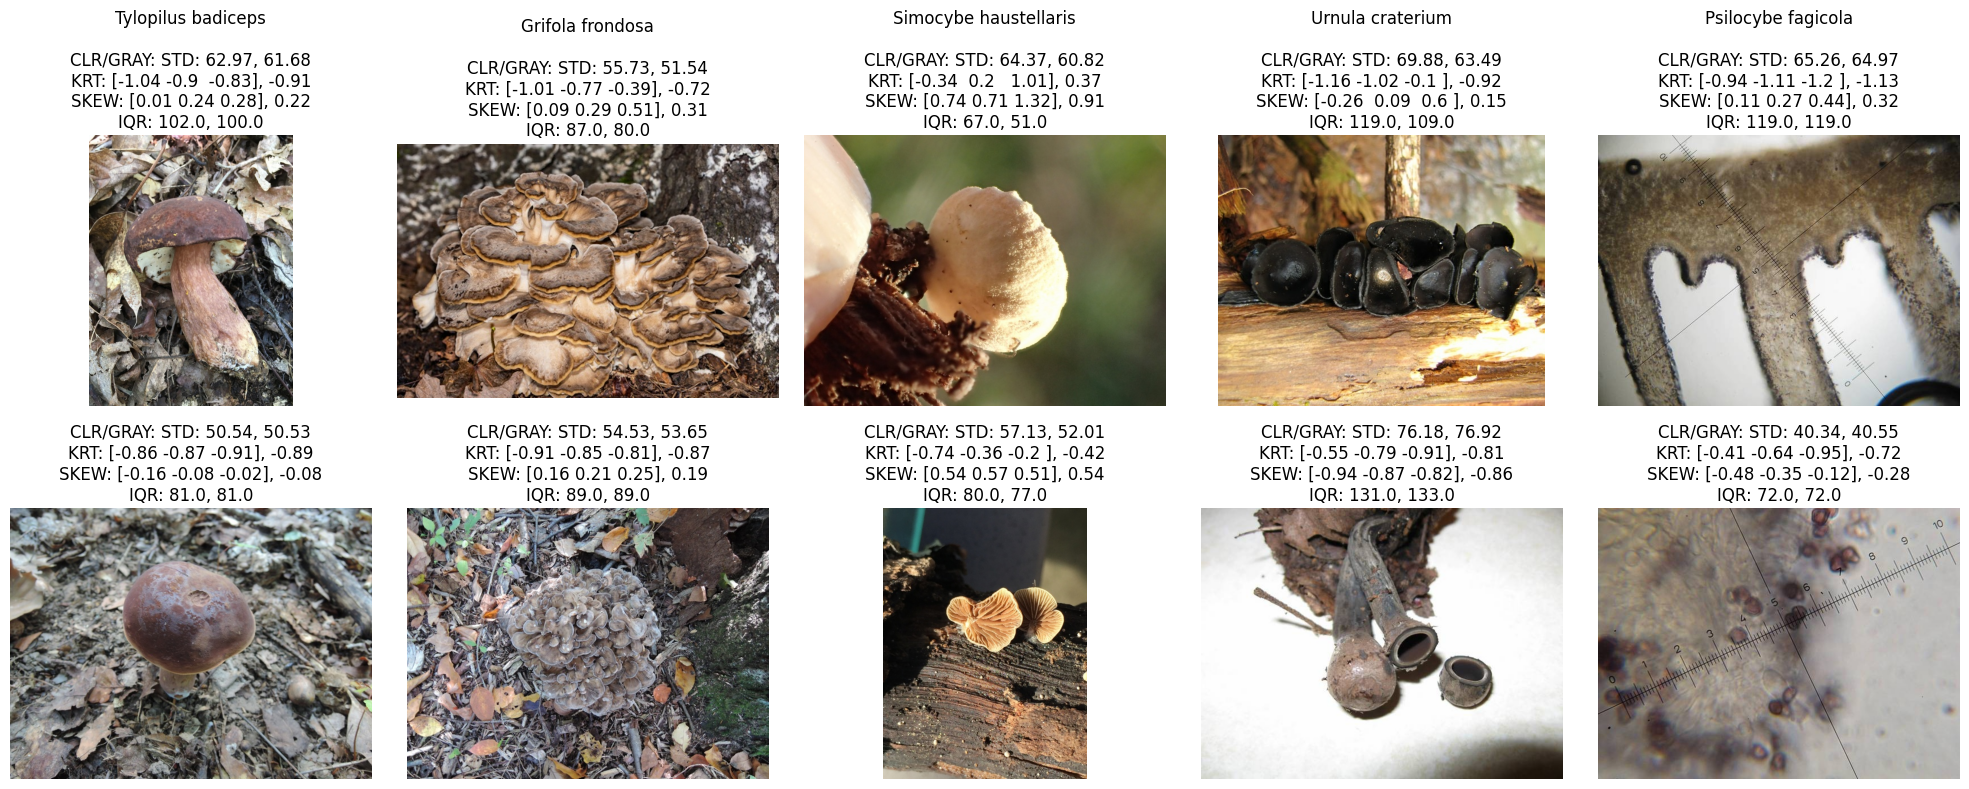

In [25]:
plt.figure(figsize=(20, 8))

classes = df['name'].sort_values().sample(5)
col_data = ImageRowData()

for i, cls in enumerate(classes, start=1):
    imgs = df[df['name'] == cls].sample(2)['file_path'].values.tolist()
    setattr(col_data, f'column{i}', (imgs[0], imgs[1]))

    for j, img in enumerate(imgs):
        im = cv2.imread(str(img))
        gray_im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        clr_im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
        gray = gray_im.reshape(-1)
        im = clr_im.reshape(-1, 3)

        plt.subplot(2, 5, i + (j * 5))
        if j == 0:
            plt.gca().set_title(f"{cls}\n\nCLR/GRAY: STD: {round(np.std(im), 2)}, {round(np.std(gray), 2)}\nKRT: {stats.kurtosis(im)}, {round(stats.kurtosis(gray), 2)}\n" +
                                f"SKEW: {stats.skew(im)}, {round(stats.skew(gray), 2)}\nIQR: {stats.iqr(im)}, {stats.iqr(gray)}")
        else:
            plt.gca().set_title(f"\n\nCLR/GRAY: STD: {round(np.std(im), 2)}, {round(np.std(gray), 2)}\nKRT: {stats.kurtosis(im)}, {round(stats.kurtosis(gray), 2)}\n" +
                                f"SKEW: {stats.skew(im)}, {round(stats.skew(gray), 2)}\nIQR: {stats.iqr(im)}, {stats.iqr(gray)}")
        plt.axis('off')
        plt.imshow(clr_im)
plt.tight_layout()

58.2526387771152


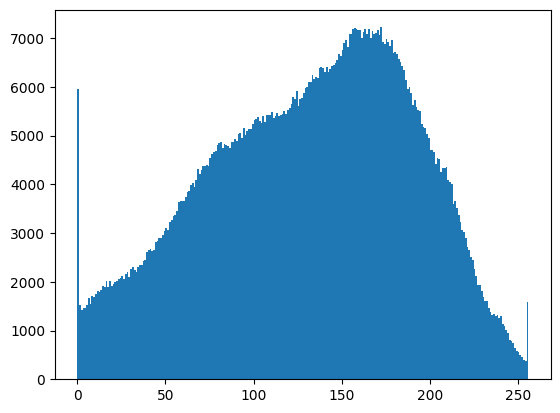

In [5]:
im = plt.imread('/home/broug/Desktop/Mushroom-Classifier/training/data/raw/2018/train_val2018/Fungi/5014/e42b36930a9966701963b7d81c8df443.jpg')
print(np.std(im))
plt.hist(im.ravel(),256,[0,256]); plt.show()

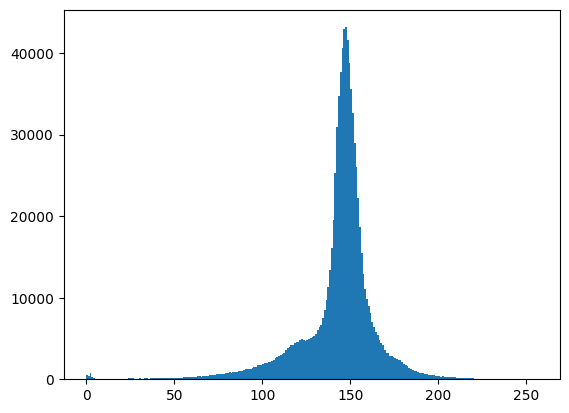

In [10]:
im = plt.imread('/home/broug/Desktop/Mushroom-Classifier/data/MO/images/493469.jpg')
plt.hist(im.ravel(),256,[0,256]); plt.show()

In [ ]:
std = train['file_path'].apply(lambda x: np.std(plt.imread(x)))
train['std'] = std
train.to_csv(tdata / 'train_std.csv', index=False)
train[train['std'] > 30].to_csv(tdata / 'train_std30.csv', index=False)

In [38]:
np.sum(np.array(im) == 0)
len(np.array(im))
len(np.array(im).ravel())

1080000

In [3]:
url = "https://images.mushroomobserver.org/3_2023-08-11-215845.tgz"

In [5]:
import requests
import shutil

def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        with open(local_filename, 'wb') as f:
            shutil.copyfileobj(r.raw, f)

    return local_filename

In [6]:
download_file(url)

'3_2023-08-11-215845.tgz'